In [7]:
pip install --upgrade pandas h5py

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 713.8 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: h5py
    Found existing installation: h5py 3.11.0
    Uninstalling h5py-3.11.0:
      Successfully uninstalled h5py-3.11.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
Note: you may need to restart the kernel to use updated packages.


In [151]:
import pandas as pd
import numpy as np
import h5py
import os
import scipy
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt

**Explore HDF5 Files**

In [3]:
path = "/Users/michaelgrybko/Desktop/Data/iPhys_2024_10_09.h5"
with h5py.File(path, 'r') as hdf:
    print("Keys in the file:", list(hdf.keys()))


Keys in the file: ['data', 'events', 'general']


In [6]:
# Inspect the Subkeys 
with h5py.File(path, 'r') as hdf:
    for key in hdf.keys():
        print(f"Key: {key}")
        print(f"Type: {type(hdf[key])}")
        if isinstance(hdf[key], h5py.Group):
            print("Subkeys:", list(hdf[key].keys()))
        elif isinstance(hdf[key], h5py.Dataset):
            print("Shape:", hdf[key].shape)
            print("Data type:", hdf[key].dtype)

Key: data
Type: <class 'h5py._hl.group.Group'>
Subkeys: ['trace_0', 'trace_1', 'trace_10', 'trace_11', 'trace_12', 'trace_13', 'trace_14', 'trace_15', 'trace_16', 'trace_17', 'trace_18', 'trace_19', 'trace_2', 'trace_20', 'trace_21', 'trace_22', 'trace_23', 'trace_24', 'trace_25', 'trace_26', 'trace_27', 'trace_3', 'trace_4', 'trace_5', 'trace_6', 'trace_7', 'trace_8', 'trace_9']
Key: events
Type: <class 'h5py._hl.group.Group'>
Subkeys: ['event_0', 'event_1', 'event_2', 'event_3', 'event_4', 'event_5', 'event_6', 'event_7']
Key: general
Type: <class 'h5py._hl.group.Group'>
Subkeys: ['AAV_Left1', 'AAV_Left2', 'AAV_Right1', 'AAV_Right2', 'Age', 'DOB', 'Date', 'Dir', 'Experimentalist', 'Manipulation_Left', 'Manipulation_Right', 'Notes', 'Reporter1', 'Reporter2', 'Sex', 'Strain', 'T_2pTime', 'T_general', 'Type']


In [8]:
# Read experiment notes
with h5py.File(path, 'r') as hdf:
    # Access the 'Notes' dataset
    notes_data = hdf['general/Notes'][()]
    # Convert from byte format to a string 
    notes_text = notes_data.decode('utf-8') if isinstance(notes_data, bytes) else notes_data
    print(notes_text)

[b'Amacrine Cell Direction Selectivity mouseid: K7378' b'' b'']


In [10]:
with h5py.File(path, 'r') as hdf:
    # Access the 'Notes' entry in the 'general' group
    event0_data = hdf['events/event_0/T_comment'][:]
    event0_text = event0_data.decode('utf-8') if isinstance(event0_data, bytes) else event0_data
    
    # Iterate over all traces
    for event_key in hdf['events/event_0'].keys():
        print(f"Notes for {event_key}: {notes}")
        
        trace_group = hdf['events/event_0'][trace_key]
        
        # Iterate over all sweeps in the trace
        for sweep_key in trace_group.keys():
            sweep_group = trace_group[sweep_key]
            ephys_group = sweep_group['ephys']

NameError: name 'notes' is not defined

In [12]:
with h5py.File(path, 'r') as hdf:
    event_0 = hdf['events/event_0']
    for subkey in event_0.keys():
        item = event_0[subkey]
        print(f"Subkey: {subkey}")
        print(f"Type: {type(item)}")
        if isinstance(item, h5py.Group):
            print(f"Nested subkeys in '{subkey}':", list(item.keys()))
        elif isinstance(item, h5py.Dataset):
            print(f"Shape of '{subkey}':", item.shape)
            print(f"Data type of '{subkey}':", item.dtype)

Subkey: T_2pZstack
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'T_2pZstack': (1,)
Data type of 'T_2pZstack': object
Subkey: T_Event
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'T_Event': (10, 2)
Data type of 'T_Event': object
Subkey: T_comment
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'T_comment': (1,)
Data type of 'T_comment': object
Subkey: eventTime
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'eventTime': (1,)
Data type of 'eventTime': object


In [14]:
# Inspect subkeys
with h5py.File(path, 'r') as hdf:
    trace_0 = hdf['data/trace_0']
    print(f"Type of 'trace_0': {type(trace_0)}")
    if isinstance(trace_0, h5py.Group):
        print("Subkeys in 'trace_0':", list(trace_0.keys()))
    elif isinstance(trace_0, h5py.Dataset):
        print("Shape of 'trace_0':", trace_0.shape)
        print("Data type of 'trace_0':", trace_0.dtype)


Type of 'trace_0': <class 'h5py._hl.group.Group'>
Subkeys in 'trace_0': ['sweep_0', 'sweep_1', 'sweep_2', 'sweep_3', 'sweep_4', 'sweep_5', 'sweep_6', 'sweep_7', 'sweep_8', 'sweep_9']


In [16]:
with h5py.File(path, 'r') as hdf:
    sweep_0 = hdf['data/trace_0/sweep_0']
    print(f"Type of 'sweep_0': {type(sweep_0)}")
    if isinstance(sweep_0, h5py.Group):
        print("Subkeys in 'sweep_0':", list(sweep_0.keys()))
    elif isinstance(sweep_0, h5py.Dataset):
        print("Shape of 'sweep_0':", sweep_0.shape)
        print("Data type of 'sweep_0':", sweep_0.dtype)



Type of 'sweep_0': <class 'h5py._hl.group.Group'>
Subkeys in 'sweep_0': ['M_EPChannelsParams', 'W_EPparams', 'ephys', 'ephys_stim']


In [39]:
# Inspect sweep 0
with h5py.File(path, 'r') as hdf:
    sweep_0 = hdf['data/trace_0/sweep_0']
    for subkey in sweep_0.keys():
        item = sweep_0[subkey]
        print(f"Subkey: {subkey}")
        print(f"Type: {type(item)}")
        if isinstance(item, h5py.Group):
            print(f"Nested subkeys in '{subkey}':", list(item.keys()))
        elif isinstance(item, h5py.Dataset):
            print(f"Shape of '{subkey}':", item.shape)
            print(f"Data type of '{subkey}':", item.dtype)

Subkey: M_EPChannelsParams
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'M_EPChannelsParams': (8, 13)
Data type of 'M_EPChannelsParams': float32
Subkey: W_EPparams
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'W_EPparams': (40,)
Data type of 'W_EPparams': float64
Subkey: ephys
Type: <class 'h5py._hl.group.Group'>
Nested subkeys in 'ephys': ['ChRead_0', 'ChRead_2']
Subkey: ephys_stim
Type: <class 'h5py._hl.group.Group'>
Nested subkeys in 'ephys_stim': ['ChWrite_0', 'ChWrite_2', 'T_Protocol', 'W_OutDigital']


In [69]:
with h5py.File(path, 'r') as hdf:
    ephys = hdf['data/trace_0/sweep_0/ephys']
    for subkey in ephys.keys():
        item = ephys[subkey]
        print(f"Subkey: {subkey}")
        print(f"Type: {type(item)}")
        if isinstance(item, h5py.Group):
            print(f"Nested subkeys in '{subkey}':", list(item.keys()))
        elif isinstance(item, h5py.Dataset):
            print(f"Shape of '{subkey}':", item.shape)
            print(f"Data type of '{subkey}':", item.dtype)

Subkey: ChRead_0
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'ChRead_0': (40001,)
Data type of 'ChRead_0': float32
Subkey: ChRead_2
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'ChRead_2': (4001,)
Data type of 'ChRead_2': float32


In [73]:
with h5py.File(path, 'r') as hdf:
    chread_0_data = hdf['data/trace_0/sweep_0/ephys/ChRead_0'][:]
    chread_2_data = hdf['data/trace_0/sweep_0/ephys/ChRead_2'][:]
    
    print("ChRead_0 shape:", chread_0_data.shape)
    print("First 10 points of ChRead_0 data:", chread_0_data[:10])
    print("ChRead_2 shape:", chread_2_data.shape)
    print("First 10 points of ChRead_2 data:", chread_2_data[:10])

ChRead_0 shape: (40001,)
First 10 points of ChRead_0 data: [-1.12121583e-10 -1.12121583e-10 -1.16821289e-10 -1.13403321e-10
 -1.09313968e-10 -1.13708494e-10 -1.14562991e-10 -1.13830563e-10
 -1.15478516e-10 -1.16638185e-10]
ChRead_2 shape: (4001,)
First 10 points of ChRead_2 data: [ 0.00020623 -0.00026419 -0.00051794  0.00058726  0.00073204  0.00041272
  0.00172916  0.0024588   0.00071789 -0.00047015]


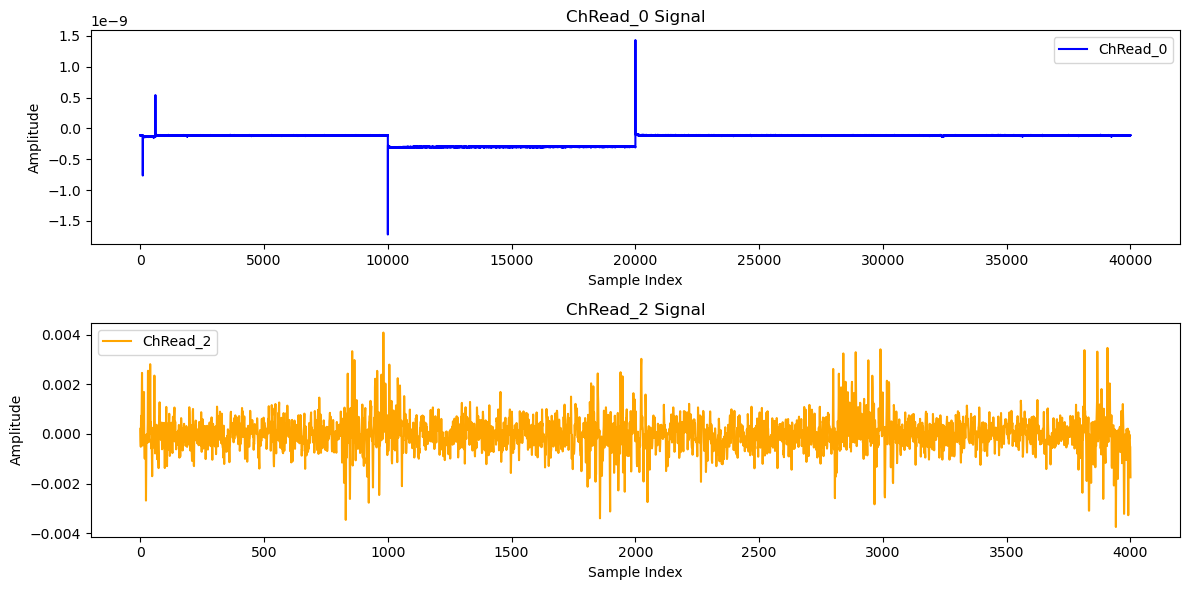

In [87]:
# Plot data/trace_0/sweep_0/ephys/ChRead_0 and data/trace_0/sweep_0/ephys/ChRead_2 to check which is the data
# Create the plots
plt.figure(figsize=(12, 6))

# Plot ChRead_0
plt.subplot(2, 1, 1)
plt.plot(chread_0_data, label='ChRead_0', color='blue')
plt.title('ChRead_0 Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

# Plot ChRead_2
plt.subplot(2, 1, 2)
plt.plot(chread_2_data, label='ChRead_2', color='orange')
plt.title('ChRead_2 Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

**Function to Import Data, Zero Noramlize the Baseline, and Return a Numpy Array**

In [20]:
def normalize_steps(file_path, trace_num, baseline_range=(5000, 5100)):
    """
    Normalizes electrophysiology voltage step data from an HDF5 file, plots the data, and returns as a NumPy array.

    Args:
        file_path (str): The path to the HDF5 file.
        trace_number (int): The trace number to analyze.
        baseline_range (tuple): Range of samples to calculate baseline (start, end).

    Returns:
        np.ndarray: A 2D NumPy array where each column is a noralized sweep from the specified trace.

                   Returns None if an error occurs.
    """
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    try:
        with h5py.File(file_path, 'r') as hdf:
            trace_group = hdf[f'data/trace_{trace_num}']
            ephys_data_list = []
            for sweep_key in trace_group.keys():
                sweep_group = trace_group[sweep_key]
                ephys_group = sweep_group['ephys']
                ephys_data = ephys_group['ChRead_0'][:]
                ephys_data_list.append(ephys_data)

            ephys_array = np.vstack(ephys_data_list).T
            # Normalize by the baseline
            baseline_values = ephys_array[baseline_range[0]:baseline_range[1], :].mean(axis=0, keepdims=True)
            normalized_array = ephys_array - baseline_values

            print(f"Normalized data shape: {normalized_array.shape}")

            variable_name = f"{file_name}_trace_{trace_num}"
            print(variable_name)
            globals()[variable_name] = normalized_array

            # plot
            plt.figure(figsize=(6, 3))
            for i in range(normalized_array.shape[1]):
                plt.plot(normalized_array[:, i], label=f'Sweep {i}')

            plt.title(f'Normalized ChRead_0 Data - Trace {trace_num}')
            plt.xlabel('Time (ms)')
            plt.ylabel('current(A)')
            plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
            plt.close()

            return globals()[variable_name]

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

**Function to Import Data, Zero Noramlize the Baseline, Subtract Out the Capacitive Current and Return a Numpy Array**

In [23]:
def normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100)):
    """
    Normalizes electrophysiology voltage step data from an HDF5 file, subtracts out capacitive current,
    plots the data, and returns as a NumPy array.

    Args:
        file_path (str): The path to the HDF5 file.
        trace_number (int): The trace number to analyze.
        baseline_range (tuple): Range of samples to calculate baseline (start, end).

    Returns:
        np.ndarray: A 2D NumPy array where each column is a noralized sweep from the specified trace.

                   Returns None if an error occurs.
    """
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    try:
        with h5py.File(file_path, 'r') as hdf:
            trace_group = hdf[f'data/trace_{trace_num}']
            ephys_data_list = []
            for sweep_key in trace_group.keys():
                sweep_group = trace_group[sweep_key]
                ephys_group = sweep_group['ephys']
                ephys_data = ephys_group['ChRead_0'][:]
                ephys_data_list.append(ephys_data)

            ephys_array = np.vstack(ephys_data_list).T
            # Normalize by the baseline
            baseline_values = ephys_array[baseline_range[0]:baseline_range[1], :].mean(axis=0, keepdims=True)
            normalized_array = ephys_array - baseline_values

            # Subtract out capacitive current
            start_artifact = [10001,10002,10003,10004,10005,10006,10007]
            end_artifact =[20001,20002,20003,20004,20005,20006,20007]
            for sweep in range(normalized_array.shape[1]):
              normalized_array[start_artifact, sweep] += normalized_array[end_artifact, sweep]
              normalized_array[end_artifact, sweep] -= normalized_array[end_artifact, sweep]

            print(f"Normalized data shape: {normalized_array.shape}")

            variable_name = f"{file_name}_trace_{trace_num}"
            print(variable_name)
            globals()[variable_name] = normalized_array

            # plot
            plt.figure(figsize=(6, 3))
            for i in range(normalized_array.shape[1]):
                plt.plot(normalized_array[:, i], label=f'Sweep {i}')

            plt.title(f'Normalized ChRead_0 Data - Trace {trace_num}')
            plt.xlabel('Time (ms)')
            plt.ylabel('current(A)')
            plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
            plt.close()

            return globals()[variable_name]

    except Exception as e:
        print(f"An error occurred: {e}")
        return None



**Function that Calculates the Average Sustained Current for Control and Experimental Conditions**

In [26]:
def voltage_sustained_current_plot(control, manipulation, time_window, voltage_steps, experiment_name=None, current_type=None, num_controls=None):
    """
    Plots voltage vs mean sustained current for control and experimental conditions with SEM

    args:
      control (NumPy array): control current traces of shape (num_traces, num_samples)
      manipulation (NumPy array): experimental manipulation current traces of shape (num_traces, num_samples)
      time_window (tuple): time window for current analysis in milliseconds (start, end)
      voltage_steps (list): list of voltage steps
      drug_name (str or None): Name of the drug/experimental condition (default is None)
      current_type (str or None): Type of current, sustained or transient (default is None)
      num_controls (int): Number of control traces (default is None)

    returns:
      Plot of voltage vs mean current with SEM
    """
    # Initialize arrays for mean currents
    mean_currents_control = []
    mean_currents_manipulation = []

    # Iterate over voltage steps - control
    for sweep_idx, voltage in enumerate(voltage_steps):
        # Extract current data for the specified time window
        current_data = np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in control])

        # Compute mean of traces for this voltage
        mean_current = current_data.mean()
        mean_currents_control.append(mean_current)

    # Iterate over voltage steps - manipulation
    for sweep_idx, voltage in enumerate(voltage_steps):
        # Extract current data for the specified time window
        current_data = np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in manipulation])

        # Compute mean of traces for this voltage
        mean_current = current_data.mean()
        mean_currents_manipulation.append(mean_current)

    # Convert results to NumPy arrays for plotting
    mean_currents_control = np.array(mean_currents_control)
    mean_currents_drug = np.array(mean_currents_manipulation)

    # Compute SEM for control and experimental conditions
    sem_currents_control = [
        np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in control]).std(ddof=1) / np.sqrt(len(control))
        for sweep_idx in range(len(voltage_steps))
    ]
    sem_currents_manipulation = [
        np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in manipulation]).std(ddof=1) / np.sqrt(len(manipulation))
        for sweep_idx in range(len(voltage_steps))
    ]

    # Create labels for the legend
    control_label = f'Control, n={num_controls}' if num_controls else 'Control'
    manipulation_label = f'{experiment_name}' if experiment_name else 'Manipulation'

    # Create labels for the title
    current_type_label = f'Voltage-Steps vs {current_type} Current' if current_type else 'Current'

    # Plot voltage vs current
    plt.figure(figsize=(8, 6))
    plt.errorbar(voltage_steps, mean_currents_control, yerr=sem_currents_control, fmt='o-', color='b', ecolor='r', capsize=5, label=control_label)
    plt.errorbar(voltage_steps, mean_currents_drug, yerr=sem_currents_manipulation, fmt='o-', color='g', ecolor='r', capsize=5, label=manipulation_label)
    plt.title(current_type_label)
    plt.xlabel('Voltage Steps(mV)')
    plt.ylabel('Mean Current(pA)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()


**Function that Calculates the Average Transient Current for Control and Experimental Conditions and Plots the Result**

In [29]:
def voltage_transient_current_plot(control, manipulation, current_time_window, baseline_time_window, voltage_steps, experiment_name=None, current_type=None, num_controls=None):
    """
    Plots voltage vs mean current for control and experimental conditions with SEM

    args:
      control (NumPy array): control current traces of shape (num_traces, num_samples)
      manipulation (NumPy array): experimental manipulation current traces of shape (num_traces, num_samples)
      current_time_window (tuple): time window for transient current analysis in milliseconds (start, end)
      baseline_time_window (tuple): time window for sustained current in milliseconds (start, end)
      voltage_steps (list): list of voltage steps
      drug_name (str or None): Name of the drug/experimental condition (default is None)
      current_type (str or None): Type of current, sustained or transient (default is None)
      num_controls (int): Number of control traces (default is None)

    returns:
      Plot of voltage vs mean current with SEM
    """
    # Initialize arrays for mean currents
    mean_currents_control = []
    mean_currents_manipulation = []

    # Iterate over voltage steps - control
    for sweep_idx, voltage in enumerate(voltage_steps):
        # Extract baseline current data for the specified time window
        baseline_data = np.array([trace[baseline_time_window[0]:baseline_time_window[1], sweep_idx].mean() for trace in control])
        # Extract current data for the specified time window
        current_data = np.array([trace[current_time_window[0]:current_time_window[1], sweep_idx].mean() for trace in control])

        # Compute mean of traces for this voltage
        mean_baseline = baseline_data.mean()
        mean_current = current_data.mean()
        # Normalize the mean transient current response by subtracting the mean sustained curent
        mean_current -= mean_baseline
        mean_currents_control.append(mean_current)

    # Iterate over voltage steps - manipulation
    for sweep_idx, voltage in enumerate(voltage_steps):
        # Extract baseline current data for the specified time window
        baseline_data = np.array([trace[baseline_time_window[0]:baseline_time_window[1], sweep_idx].mean() for trace in manipulation])
        # Extract current data for the specified time window
        current_data = np.array([trace[current_time_window[0]:current_time_window[1], sweep_idx].mean() for trace in manipulation])

        # Compute mean of traces for this voltage
        mean_baseline = baseline_data.mean()
        mean_current = current_data.mean()
        # Normalize the mean transient current response by subtracting the mean sustained curent
        mean_current -= mean_baseline
        mean_currents_manipulation.append(mean_current)

    # Convert results to NumPy arrays for plotting
    mean_currents_control = np.array(mean_currents_control)
    mean_currents_drug = np.array(mean_currents_manipulation)

    # Compute SEM for control and experimental conditions
    sem_currents_control = [
        np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in control]).std(ddof=1) / np.sqrt(len(control))
        for sweep_idx in range(len(voltage_steps))
    ]
    sem_currents_manipulation = [
        np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in manipulation]).std(ddof=1) / np.sqrt(len(manipulation))
        for sweep_idx in range(len(voltage_steps))
    ]

    # Create labels for the legend
    control_label = f'Control, n={num_controls}' if num_controls else 'Control'
    manipulation_label = f'{experiment_name}' if experiment_name else 'Manipulation'

    # Create labels for the title
    current_type_label = f'Voltage-Steps vs {current_type} Current' if current_type else 'Current'

    # Plot voltage vs current
    plt.figure(figsize=(8, 6))
    plt.errorbar(voltage_steps, mean_currents_control, yerr=sem_currents_control, fmt='o-', color='b', ecolor='r', capsize=5, label=control_label)
    plt.errorbar(voltage_steps, mean_currents_drug, yerr=sem_currents_manipulation, fmt='o-', color='g', ecolor='r', capsize=5, label=manipulation_label)
    plt.title(current_type_label)
    plt.xlabel('Voltage Steps(mV)')
    plt.ylabel('Mean Current(pA)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()

**Function to Calculate the Exponential Decay of the Current**

In [34]:
def exponential_decay(x, a, tau, c):
    """Exponential decay function"""
    return a * np.exp(-(x) / tau) + c

**Function that Calculates the Current Decay Time for Control and Experimental Conditions and Plots the Result**

In [159]:
def exp_decay_plot(control, manipulation, voltage_steps, time_window, tau, experiment_name=None, num_controls=None):
    """
    Fits exponential decay for each sweep, and measures and returns decay timess.

    Args:
      control (NumPy array): control current traces of shape (num_traces, num_samples)
      manipulation (NumPy array): experimental manipulation current traces of shape (num_traces, num_samples)
      voltage_steps (list): List of voltage steps corresponding to each sweep.
      time_window (tuple): Tuple (start_idx, end_idx) indicating the time window for decay fitting.
      tau (integer): an estimate of the exponential decay time constant.
      experiment_name (str or None): Name of the experiment (default is None).
      num_controls (int): Number of control traces (default is None).

    Returns:
      Plot of voltage vs mean decay time with S.E.M. for the group of experiments.
    """
    # Initialize arrays for mean decay times
    decay_times_control = []
    decay_times_manipulation = []

    # Extract time window indices
    start_idx, end_idx = time_window
    time_points = np.arange(end_idx - start_idx)

    # Iterate over each experiment in the control group
    for experiment_idx, sweeps in enumerate(control):
        decay_times = []

        # Iterate over sweeps in the current experiment
        for i, sweep in enumerate(sweeps.T):
            sweep_window = sweep[start_idx:end_idx]
            # Parameter estimates
            a = np.max(sweep_window) - np.min(sweep_window)
            tau_estimate = tau  # An estimate of the decay time constant
            c = np.min(sweep_window)

            # Fit exponential decay function to the current trace within the time window
            try:
                # Exponential curve fitting, calls exponetial_decay funciton
                popt, _ = curve_fit(exponential_decay, time_points, sweep_window, p0=[a, tau_estimate, c])
                _, tau_fit, _ = popt  # Extract decay time constant (tau)
                if tau_fit > tau_estimate * 3:
                  tau_fit = 0
                elif tau_fit < 0:
                  tau_fit = 0
                decay_times.append(tau_fit)

            except RuntimeError:
                print(f"Could not fit exponential decay to sweep {i} in experiment {experiment_name[experiment_idx] if experiment_name else experiment_idx}.")
                decay_times.append(np.nan)  # Append NaN if fit fails

        # Store the decay times for the current experiment
        decay_times_control.append(decay_times)

    # Calculate mean and SEM across all experiments for each voltage step
    decay_times_control = np.array(decay_times_control)  # Convert to NumPy array for easier calculations
    mean_control_decay_times = np.nanmean(decay_times_control, axis=0)
    sem_control_decay_times = np.nanstd(decay_times_control, axis=0) / np.sqrt(np.count_nonzero(~np.isnan(decay_times_control), axis=0))

    # Iterate over each experiment in the manipulation group
    for experiment_idx, sweeps in enumerate(manipulation):
        decay_times = []

        # Iterate over sweeps in the current experiment
        for i, sweep in enumerate(sweeps.T):
            sweep_window = sweep[start_idx:end_idx]
            # Parameter estimates
            a = np.max(sweep_window) - np.min(sweep_window)
            tau_estimate = tau  # An estimate of the decay time constant
            c = np.min(sweep_window)

            # Fit exponential decay function to the current trace within the time window
            try:
                # Exponential curve fitting
                popt, _ = curve_fit(exponential_decay, time_points, sweep_window, p0=[a, tau_estimate, c])
                _, tau_fit, _ = popt  # Extract decay time constant (tau)
                if tau_fit > tau_estimate * 3:
                  tau_fit = 0
                elif tau_fit < 0:
                  tau_fit = 0
                decay_times.append(tau_fit)

            except RuntimeError:
                print(f"Could not fit exponential decay to sweep {i} in experiment {experiment_name[experiment_idx] if experiment_name else experiment_idx}.")
                decay_times.append(np.nan)  # Append NaN if fit fails

        # Store the decay times for the current experiment
        decay_times_manipulation.append(decay_times)

    # Calculate mean and SEM across all experiments for each voltage step
    decay_times_manipulation = np.array(decay_times_manipulation)  # Convert to NumPy array for easier calculations
    mean_manipulation_decay_times = np.nanmean(decay_times_manipulation, axis=0)
    sem_manipulation_decay_times = np.nanstd(decay_times_manipulation, axis=0) / np.sqrt(np.count_nonzero(~np.isnan(decay_times_manipulation), axis=0))

    # Create labels for the legend
    control_label = f'Control, n={num_controls}' if num_controls else 'Control'
    manipulation_label = f'{experiment_name}' if experiment_name else 'Manipulation'

    # Plot voltage vs mean decay time with S.E.M.
    plt.figure(figsize=(8, 6))
    plt.errorbar(voltage_steps, mean_control_decay_times, yerr=sem_control_decay_times, fmt='o', color='b', linestyle='-', capsize=5, label=control_label)
    plt.errorbar(voltage_steps, mean_manipulation_decay_times, yerr=sem_manipulation_decay_times, fmt='o', color='g', linestyle='-', capsize=5, label=manipulation_label)
    plt.xlabel('Voltage Step (mV)')
    plt.ylabel('Decay Time (ms)')
    plt.title(f'Voltage vs Mean Decay Time')
    plt.grid(True)
    plt.legend()
    plt.show()

**GRNA Knockdown Experiments**
iPhys_2024_11_13 – Cell1 steps traces 0-3. Cell2 steps traces 5,6,10,11
iPhys_2024_11_19 – Cell1steps  traces 0-3, moving bar trace v.c. 4, c.c. 6,7. Cell2steps  traces 8-11, moving bar c.c. 12 


In [121]:
def ImportMultipleTraces(exps, traces, dir):
    for exp, trace in zip(exps, traces):
        file_path = os.path.join(dir, exp + ".h5")
        result = normalize_steps2(file_path, trace, baseline_range=(5000, 5100))
    return result



Normalized data shape: (40001, 10)
iPhys_2024_11_13_trace_0


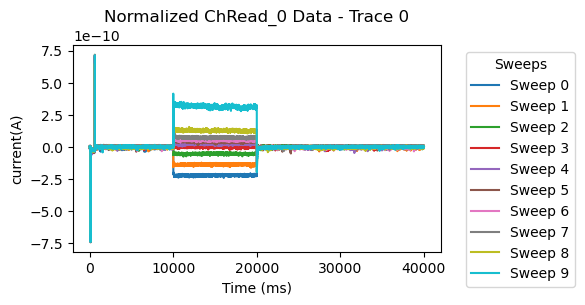

Normalized data shape: (40001, 10)
iPhys_2024_11_13_trace_5


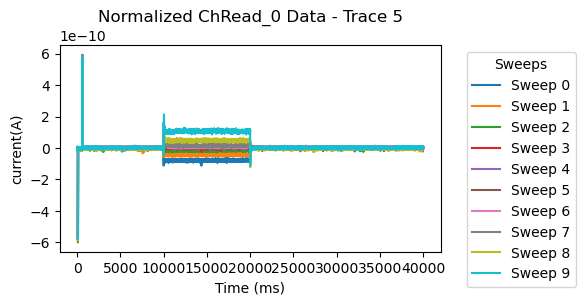

Normalized data shape: (40001, 10)
iPhys_2024_11_19_trace_0


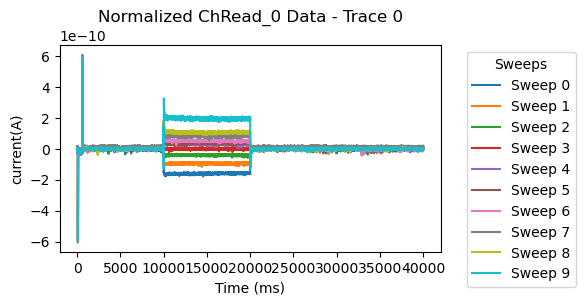

Normalized data shape: (40001, 10)
iPhys_2024_11_19_trace_8


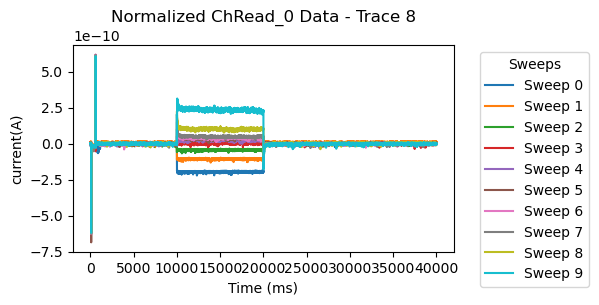

In [123]:
grna_exps = ('iPhys_2024_11_13', 'iPhys_2024_11_13', 'iPhys_2024_11_19', 'iPhys_2024_11_19')
grna_traces = [0,5,0,8]
dir = "/Users/michaelgrybko/Desktop/Data/"

result = ImportMultipleTraces(grna_exps, grna_traces, dir)

'iPhys_2024_11_13_trace_0', 'iPhys_2024_11_13_trace_5', 'iPhys_2024_11_19_trace_0', 'iPhys_2024_11_19_trace_8'

Normalized data shape: (40001, 10)
iPhys_2024_10_01_trace_2


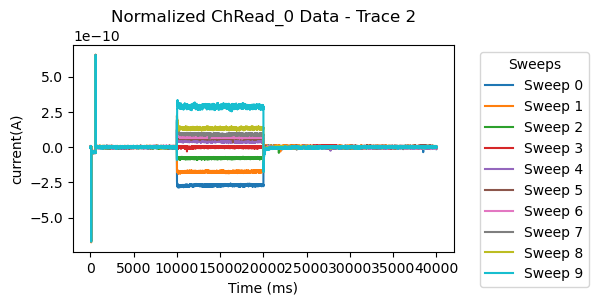

Normalized data shape: (40001, 10)
iPhys_2024_11_06_1_trace_0


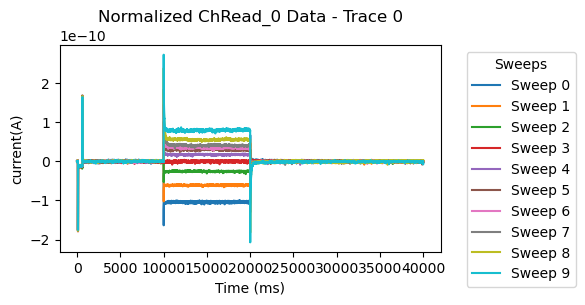

Normalized data shape: (40001, 10)
iPhys_2024_11_06_2_trace_9


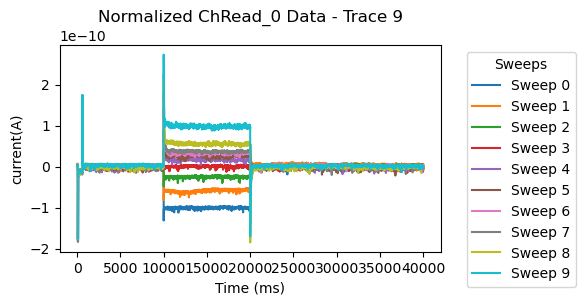

Normalized data shape: (40001, 10)
iPhys_2024_10_09_trace_0


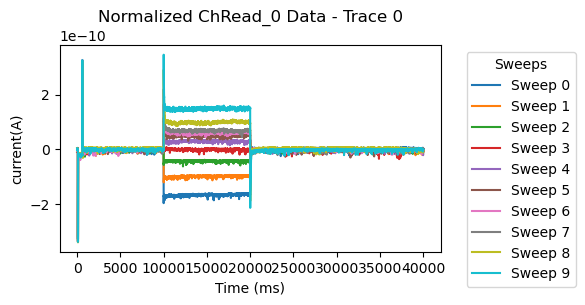

Normalized data shape: (40001, 10)
iPhys_2024_10_09_trace_13


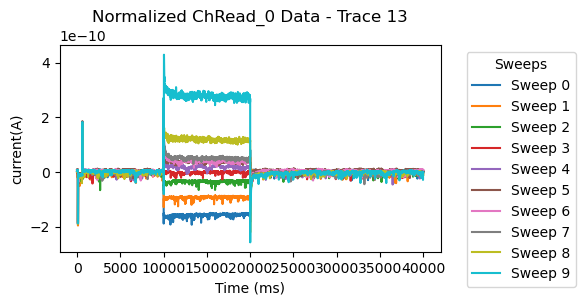

Normalized data shape: (40001, 10)
iPhys_2024_10_22_1_trace_1


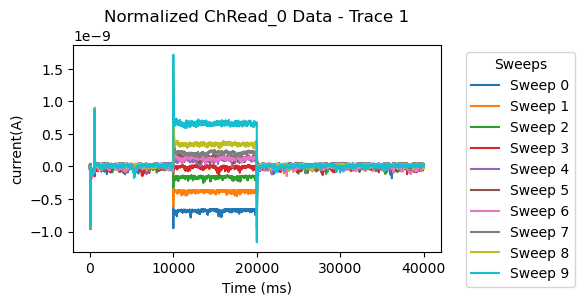

Normalized data shape: (40001, 10)
iPhys_2024_09_17_trace_0


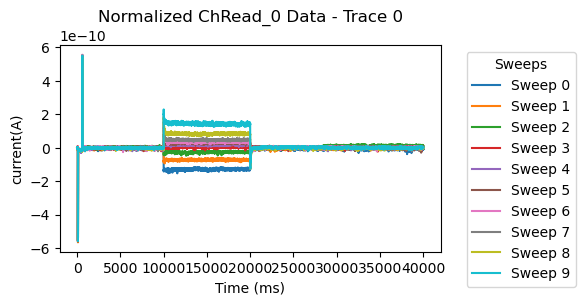

Normalized data shape: (40001, 10)
iPhys_2024_08_20_trace_0


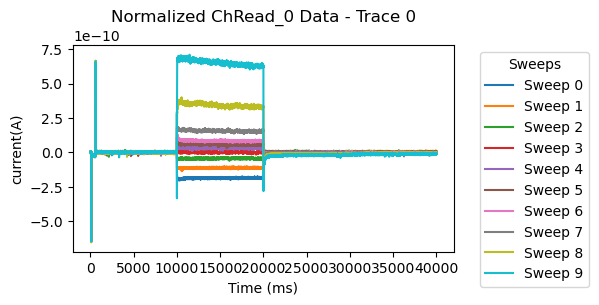

In [125]:
cntl_exps = ('iPhys_2024_10_01', 'iPhys_2024_11_06_1', 'iPhys_2024_11_06_2', 'iPhys_2024_10_09', 
             'iPhys_2024_10_09', 'iPhys_2024_10_22_1', 'iPhys_2024_09_17', 'iPhys_2024_08_20')
cntl_traces = [2,0,9,0,13,1,0,0]
dir = "/Users/michaelgrybko/Desktop/Data/"

result = ImportMultipleTraces(cntl_exps, cntl_traces, dir)

In [133]:
grna_steps = np.array([iPhys_2024_11_13_trace_0, iPhys_2024_11_13_trace_5, iPhys_2024_11_19_trace_0, iPhys_2024_11_19_trace_8])
cntl_steps = np.array([iPhys_2024_10_01_trace_2,iPhys_2024_11_06_1_trace_0,iPhys_2024_11_06_2_trace_9,iPhys_2024_10_09_trace_0,
                       iPhys_2024_10_09_trace_13,iPhys_2024_10_22_1_trace_1,iPhys_2024_09_17_trace_0,iPhys_2024_08_20_trace_0])

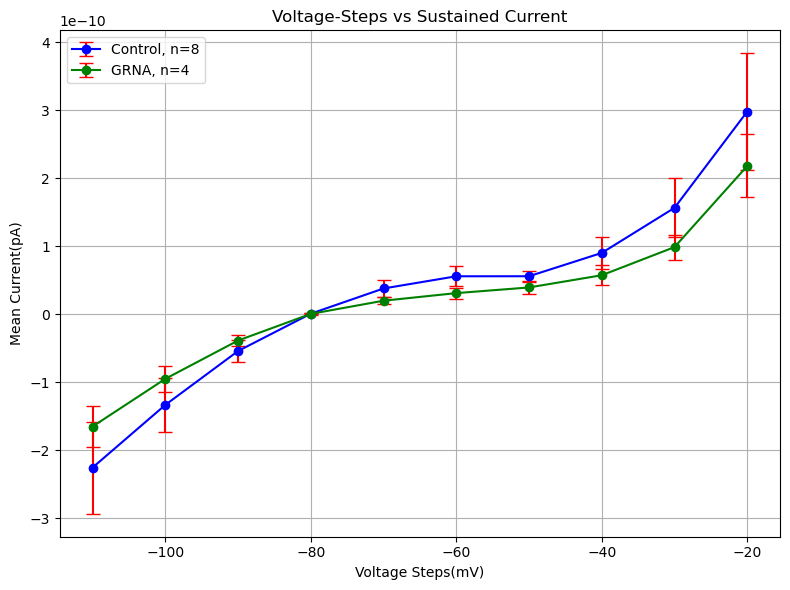

In [139]:
control = cntl_steps
manipulation = grna_steps
time_window = (11000, 11100)
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
experiment_name = 'GRNA, n=4'
current_type = 'Sustained'
num_controls = len(cntl_steps)
voltage_sustained_current_plot(control, manipulation, time_window, voltage_steps, experiment_name, current_type, num_controls)

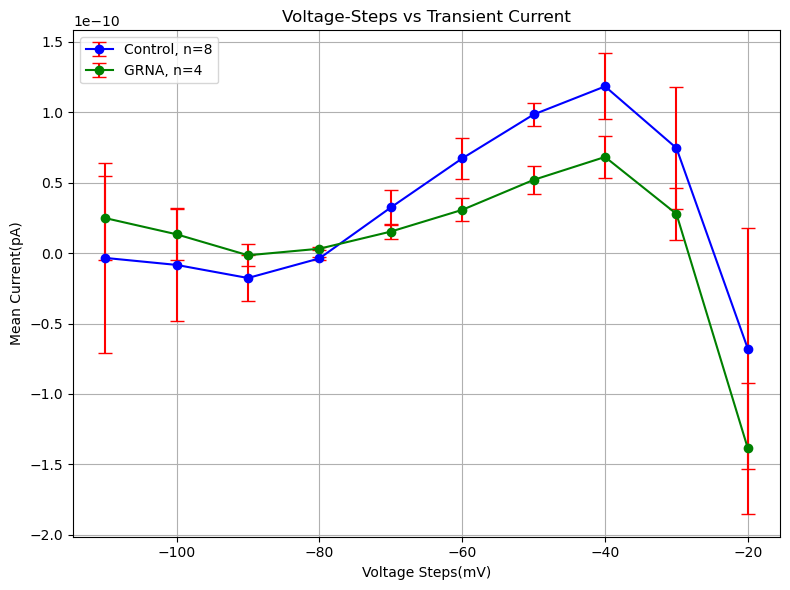

In [147]:
control = cntl_steps
manipulation = grna_steps
current_time_window = (10007, 10009)
baseline_time_window = (13000, 13100)
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
experiment_name = 'GRNA, n=4'
current_type = 'Transient'
num_controls = len(cntl_steps)
voltage_transient_current_plot(control, manipulation, current_time_window, baseline_time_window, voltage_steps, experiment_name, current_type, num_controls)

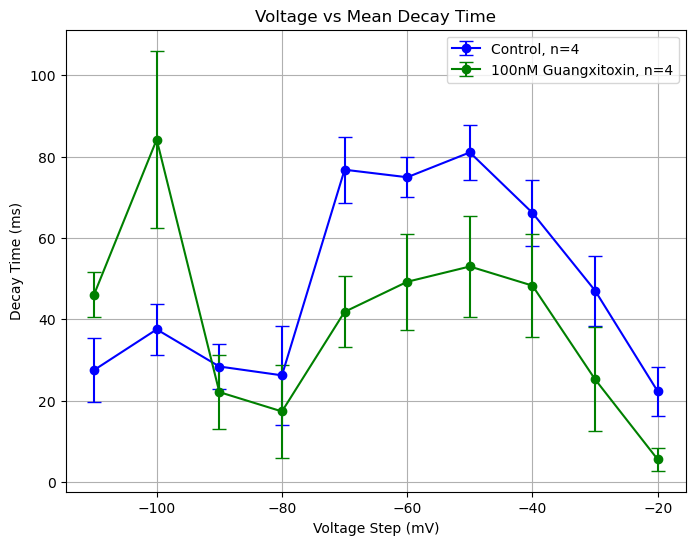

In [161]:
control = cntl_steps
manipulation = grna_steps
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
time_window = (10010, 10350)
tau = 60
experiment_name = '100nM Guangxitoxin, n=4'
num_controls = 4
exp_decay_plot(control, manipulation, voltage_steps, time_window, tau, experiment_name, num_controls)
